In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.io.wavfile import write
from scipy.io.wavfile import read
import IPython

40 samples!


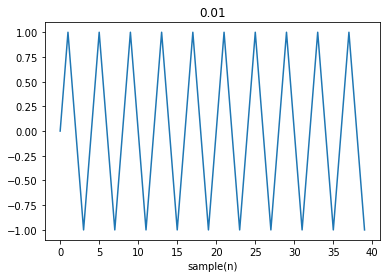

In [216]:
import matplotlib.pyplot as plt
import numpy as np

#pulse duration = samples/Fs, duration*Fs = samples
duration = .01
Fs = 4000
f = 1000
sample = round(duration*Fs)
print(str(sample) + ' samples!')

x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x[:500], y[:500])
plt.xlabel('sample(n)')
plt.title(sample/Fs)
plt.show()

In [217]:
write('OOK.wav', Fs, y.astype(np.float32))
IPython.display.Audio('OOK.wav')

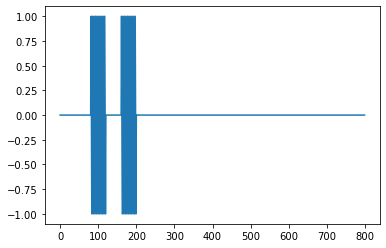

In [218]:
#put 4 symbols together, transmit (1 0 1)
out = np.zeros(20*sample)
out[2*sample:3*sample] = y
out[4*sample:5*sample] = y

plt.plot(out)

In [219]:
write('OOKseq.wav', Fs, out.astype(np.float32))
IPython.display.Audio('OOKseq.wav')

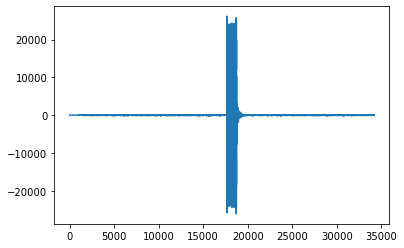

In [233]:
file = 'OOKtest'
samplerate, x = read(file+'.wav')
#plt.plot(x[5000:10000])
plt.plot(x)
IPython.display.Audio(file+'.wav')

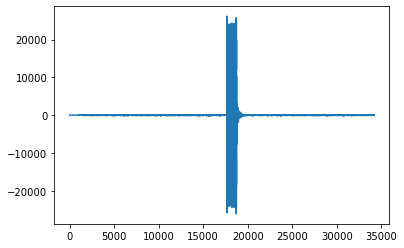

In [234]:
#x=x[5000:7500]
plt.plot(x)

In [222]:
#note each block for duration of .2 sec is 800 samples,
#we are going to find the first pulse by comparing 400 samples ago with the current sample
#once we find our starting point, we decide to 'sample' (detect 1 or 0) by advancing 800 samples from the reference point

sigStart = 0
step = int(sample/2)
print('step: ' + str(step))
for i in range(step, len(x)):
    currSample = x[i]
    pastSample = x[i-step]
    if np.abs(currSample-pastSample) > 10000:
        sigStart = i + step
        print(sigStart)
        break

step: 20
5642


In [223]:
#contains the indecies of the array where we sample our signal
sampleIndex = []
for i in range(sigStart, len(x), sample):
    sampleIndex.append(i)

5642


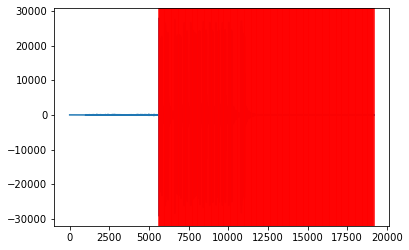

In [224]:
#plt.plot(x[5000:6000])
print(sampleIndex[0])
plt.plot(x)
#plt.axvline(sampleIndex[0],color='red')
for index in sampleIndex:
    plt.axvline(index,color='red')

In [225]:
#extract the sequence
dataIndex = []
for i in range(0, len(sampleIndex)):
    index = int(sampleIndex[i])
    if index > len(x):
        break
    if np.abs(x[index]) > 10000:
        dataIndex.append(1)
    else:
        dataIndex.append(0)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

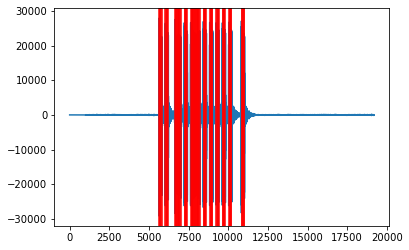

In [226]:
#display the results
plt.plot(x)
for i in range(len(dataIndex)):
    if dataIndex[i] == 1 or dataIndex == 0:
        plt.axvline(sampleIndex[i], color = 'red')
print(dataIndex)

In [227]:
#idea: we need to synchronize the clock somehow, perhaps have some sort of sync code and then read the message after
#run sequence: 1,0,1, and then read following data
#idea: once we have real data, run a bandpass filter that will leave behind the actual signal and remove noise

In [228]:
#make function that allows us to enter bits, and creates the output signal

In [229]:
def tx(bits, y):
    txSeq = np.zeros(len(bits)*sample)
    for i in range(len(bits)):
        if bits[i] == 1:
            txSeq[i*sample:(i+1)*sample] = y
    return txSeq

In [230]:
def rx(x, sample):
    rxBits = []
    
    #determine signal start
    sigStart = 0
    step = int(sample/2)
    print('step: ' + str(step))
    for i in range(step, len(x)):
        currSample = x[i]
        pastSample = x[i-step]
        if np.abs(currSample-pastSample) > 10000:
            sigStart = i + step
            print(sigStart)
            break
            
    #extract the sequence
    dataIndex = []
    for i in range(0, len(sampleIndex)):
        index = int(sampleIndex[i])
        if index > len(x):
            break
        if np.abs(x[index]) > 10000:
            dataIndex.append(1)
        else:
            dataIndex.append(0)
            
    return dataIndex

step: 20
17668
[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

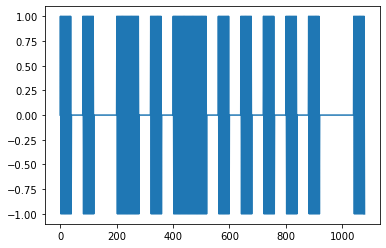

In [235]:
bits = [1,0,1,0,0,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1]
#test  [1,0,1,0,0,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1]
out = tx(bits,y)
rxBits = rx(x,sample)
print(bits)
print(rxBits)
plt.plot(out)

In [232]:
write('OOKseq.wav', Fs, out.astype(np.float32))
IPython.display.Audio('OOKseq.wav')